In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  


In [91]:
dfa = pd.read_csv('athlete_events.csv')
dfa

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


#### Content
- The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - Male(M) or Female(F)
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [92]:
dfa.shape

(271116, 15)

In [93]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [94]:
dfa.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [95]:
dfa.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [96]:
dfr = pd.read_csv('noc_regions.csv')
dfr.drop('notes', axis=1, inplace=True)
dfr.head(5)

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [97]:
df = dfa.merge(dfr, how='left',on='NOC')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [98]:
df.drop(['ID', 'Team', 'Games'], axis=1, inplace=True)
df

,Name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,Piotr ya,M,27.0,176.0,59.0,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


In [99]:
df.Year.sort_values(ascending=True).unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [100]:
df.shape

(271116, 13)

In [101]:
df.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   NOC     271116 non-null  object 
 6   Year    271116 non-null  int64  
 7   Season  271116 non-null  object 
 8   City    271116 non-null  object 
 9   Sport   271116 non-null  object 
 10  Event   271116 non-null  object 
 11  Medal   39783 non-null   object 
 12  region  271116 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 29.0+ MB


In [103]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         0
dtype: int64

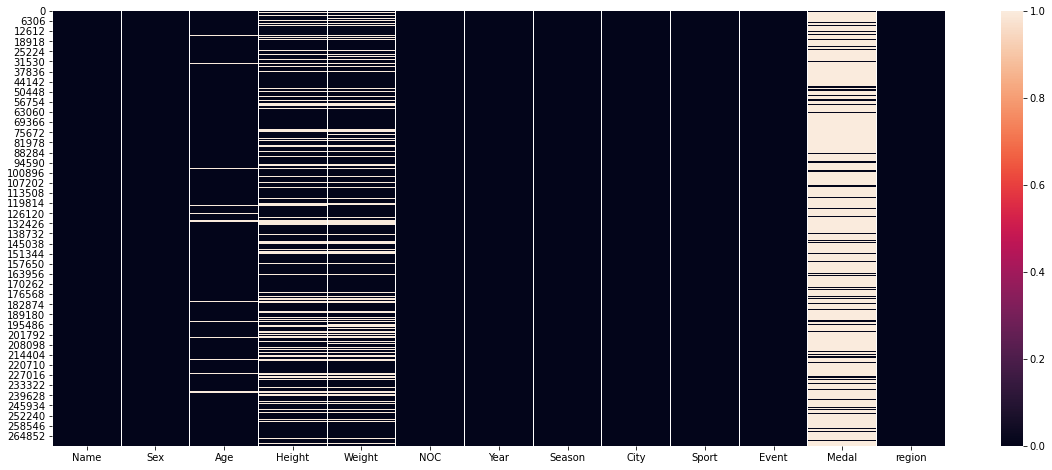

In [104]:
# Viewing missing value with help of heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())
plt.show()

### Data Cleaning

### cleanning Data
- Age contains null values.
- Height contains nulll values.
- Weight contains null values.
- Medal has null values.

### Naming Conversion

In [105]:
df[df.region=='UK']
df[df.region=='Trinidad']
df.region.replace({"UK":'United Kingdom', "Trinidad":'Trinidad and Tobago'},inplace=True)

In [106]:
df.rename(columns={'Sex':'Gender'},inplace=True)

In [107]:
df.rename(columns={'region':'Region'},inplace=True)

#### Duplicates

In [108]:
df.duplicated().sum()
df.drop_duplicates(keep='last', inplace=True, ignore_index=True )

In [109]:
df.shape

(269718, 13)

In [110]:
df = df.drop_duplicates(subset=['NOC', 'Season', 'City', 'Sport', 'Event', 'Medal'])

In [111]:
df.shape

(121507, 13)

In [112]:
df.isnull().sum()

Name           0
Gender         0
Age         3083
Height     21319
Weight     21973
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     102808
Region         0
dtype: int64

#### Age

In [113]:
df.Age.isnull().sum()

3083

In [114]:
df['Age'].mean()
df.Age.fillna(df['Age'].mean(), inplace=True)
df.Age.isnull().sum()
df['Age'] = df['Age'].astype(int)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-114-7e26c379d931>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


#### Height

In [115]:
h = df.Height.mean()
h

174.7296482612688

In [116]:
df.Height.fillna(h, inplace=True)

In [117]:
df.Height.isnull().sum()

0

In [118]:
df['Height'] = df['Height'].astype(int)

<ipython-input-118-c364b23d25eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'] = df['Height'].astype(int)


#### Weight

In [119]:
df.Weight.isnull().sum()

21973

In [120]:
w = df.Weight.mean()
df.Weight.fillna(w, inplace=True)
df['Weight'] = df['Weight'].astype(int)
df.isnull().sum()

<ipython-input-120-9c601cde9d4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].astype(int)


Name           0
Gender         0
Age            0
Height         0
Weight         0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     102808
Region         0
dtype: int64

In [121]:
display(df.dtypes)

Name      object
Gender    object
Age        int32
Height     int32
Weight     int32
NOC       object
Year       int64
Season    object
City      object
Sport     object
Event     object
Medal     object
Region    object
dtype: object

## Visualization

## 1. Gender wise distribution

### 1. Total Participants

In [122]:
gender = df['Gender'].value_counts()
print('Total Male(M) and Female(F) paricipants :- ')
print(gender)

Total Male(M) and Female(F) paricipants :- 
M    86330
F    35177
Name: Gender, dtype: int64


<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Total Participants \n (M = Male || F = Female) \n')

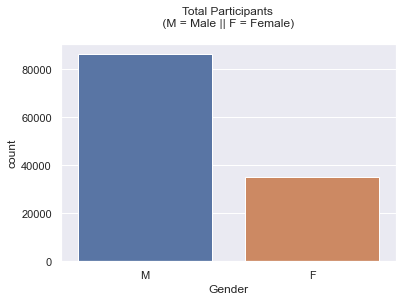

In [126]:
plt.figure(figsize = (16,9)) # figure size with ratio 16:9
sns.set(style='darkgrid',) # background darkgrid style of graph 
plt.show()
sns.countplot(df.Gender)
plt.title('Total Participants \n (M = Male || F = Female) \n')

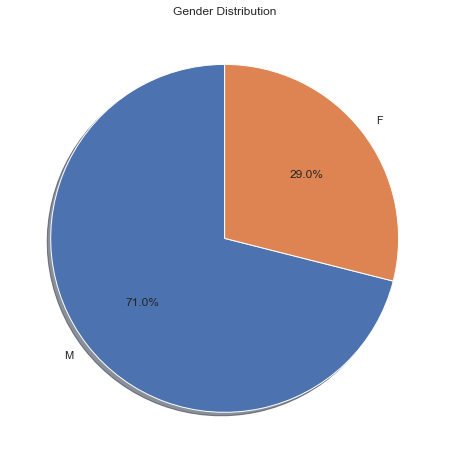

In [134]:
plt.figure(figsize=(12,8))
plt.title('Gender Distribution')
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, shadow=True);

### 2. Male and Female, Who won any medal

### Female

Bronze    1830
Silver    1764
Gold      1742
Name: Medal, dtype: int64


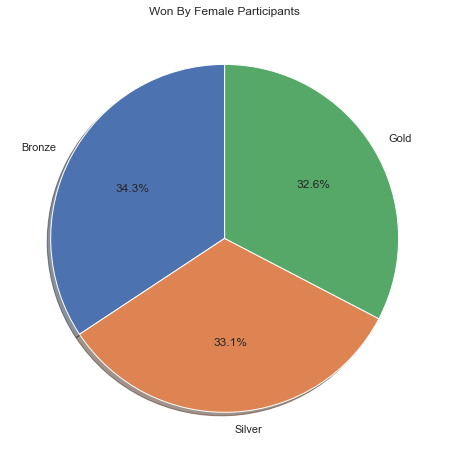

In [133]:
male = df[df.Gender == 'F']
male=male.dropna()
f = male.Medal.value_counts()
print(f)
plt.figure(figsize=(12,8))
plt.title('Won By Female Participants')
plt.pie(f, labels=f.index, autopct='%1.1f%%', startangle=90, shadow=True);

### Male

Bronze    4673
Gold      4356
Silver    4334
Name: Medal, dtype: int64


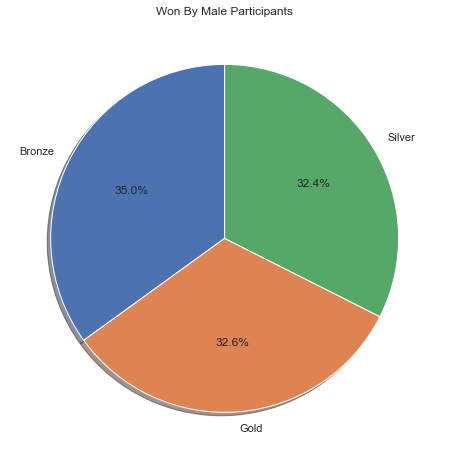

In [132]:
male = df[df.Gender == 'M']
male=male.dropna()
m = male.Medal.value_counts()
print(m)
plt.figure(figsize=(12,8))
plt.title('Won By Male Participants')
plt.pie(m, labels=m.index, autopct='%1.1f%%', startangle=90, shadow=True);

## 2. Country wise distribution

### 1. Top 50 participants countries

In [135]:
#Top 50 countries participating
t50_countries = df.Region.value_counts().sort_values(ascending=False).head(50)
#t50_countries

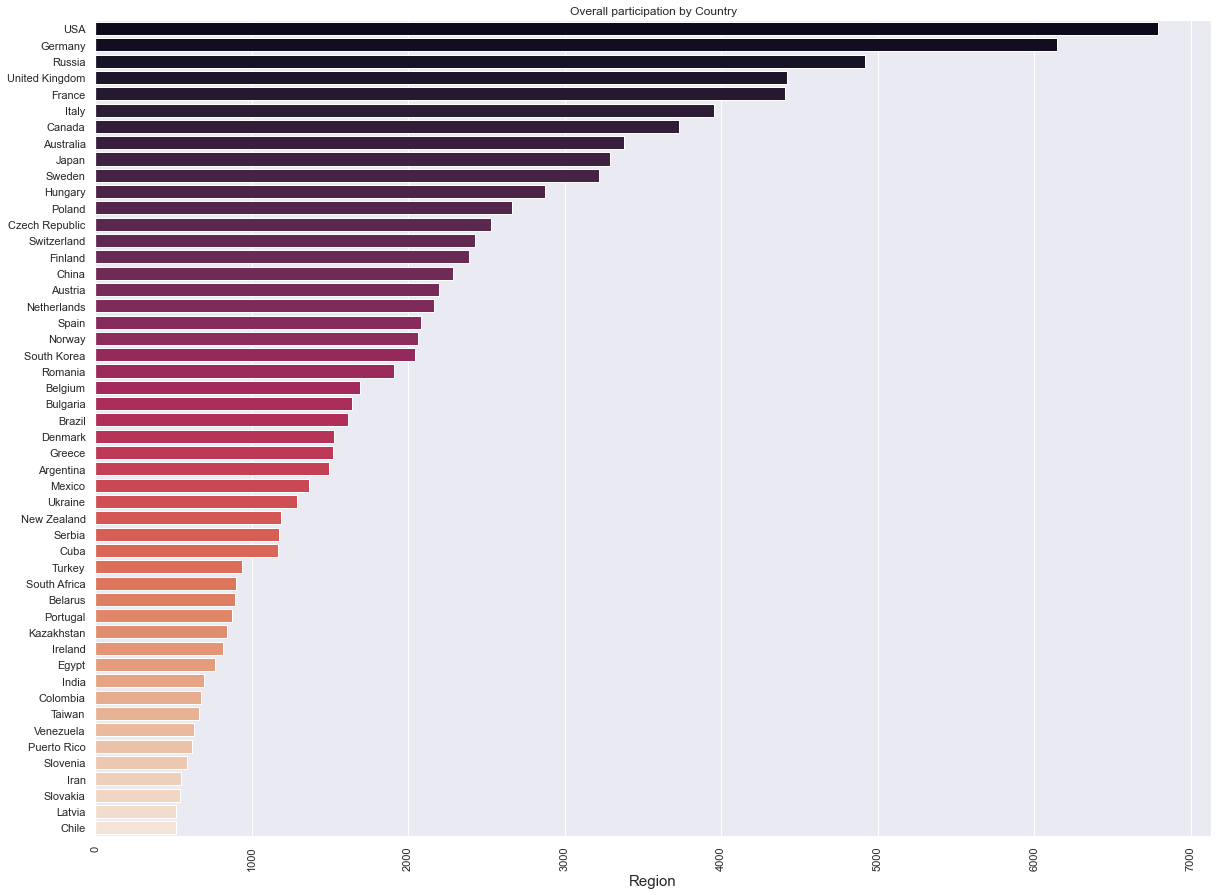

In [136]:
#plot for the top 50 countries

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
plt.title('Overall participation by Country')
plt.xlabel('Countries', fontsize=15)
sns.barplot(x=t50_countries, y=t50_countries.index, palette = 'rocket');

In [137]:
df.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
0,A Dijiang,M,24,180,80,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23,170,60,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24,174,70,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34,174,70,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21,185,82,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [138]:
dff = df.dropna()
d1 = dff[['Region', 'Medal']]
d1.head(3)

,Region,Medal
3,Denmark,Gold
37,Finland,Bronze
38,Finland,Bronze


In [139]:
x = d1[d1.Medal == 'Gold'].Region.value_counts().sort_values(ascending=False).head(50)
x
y = d1[d1.Medal == 'Silver'].Region.value_counts().sort_values(ascending=False).head(50)
y
z = d1[d1.Medal == 'Bronze'].Region.value_counts().sort_values(ascending=False).head(50)
z.head(5)

USA               770
Germany           596
Russia            583
France            327
United Kingdom    304
Name: Region, dtype: int64

AttributeError: 'numpy.ndarray' object has no attribute 'index'

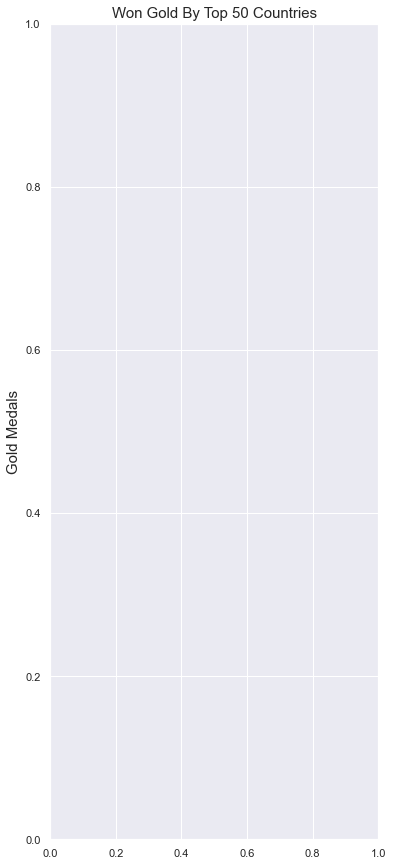

In [240]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(1,3,1)
plt.title('Won Gold By Top 50 Countries', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=x, y=x.index, palette = 'rocket');
#sns.lineplot(x=x, y=x.index, palette = 'crest');

plt.subplot(1,3,2)
plt.title('Won Silver By Top 50 Countries', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=y, y=y.index, palette = 'rocket');
#sns.lineplot(x=y, y=y.index, color='b', palette = 'crest');

plt.subplot(1,3,3)
plt.title('Won Silver By Top 50 Countries', fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=z, y=z.index, palette = 'rocket');
#sns.lineplot(x=z, y=z.index, color='b', palette = 'crest');

plt.tight_layout()

## 3. Year Wise Medal Distribution

In [141]:
dff.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
3,Edgar Lindenau Aabye,M,34,174,70,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,Arvo Ossian Aaltonen,M,30,174,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,Arvo Ossian Aaltonen,M,30,174,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,Juhamatti Tapio Aaltonen,M,28,184,85,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,Paavo Johannes Aaltonen,M,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [142]:
yr = dff[['Year', 'Medal']]
yr.Medal.value_counts()

Bronze    6503
Gold      6098
Silver    6098
Name: Medal, dtype: int64

In [143]:
g = yr[yr.Medal == 'Gold'].Year.value_counts().sort_index(ascending=True).head(50)
s = yr[yr.Medal == 'Silver'].Year.value_counts().sort_index(ascending=True).head(50)
b = yr[yr.Medal == 'Bronze'].Year.value_counts().sort_index(ascending=True).head(50)
b.head(5)

1896     34
1900     88
1904     89
1906     72
1908    100
Name: Year, dtype: int64

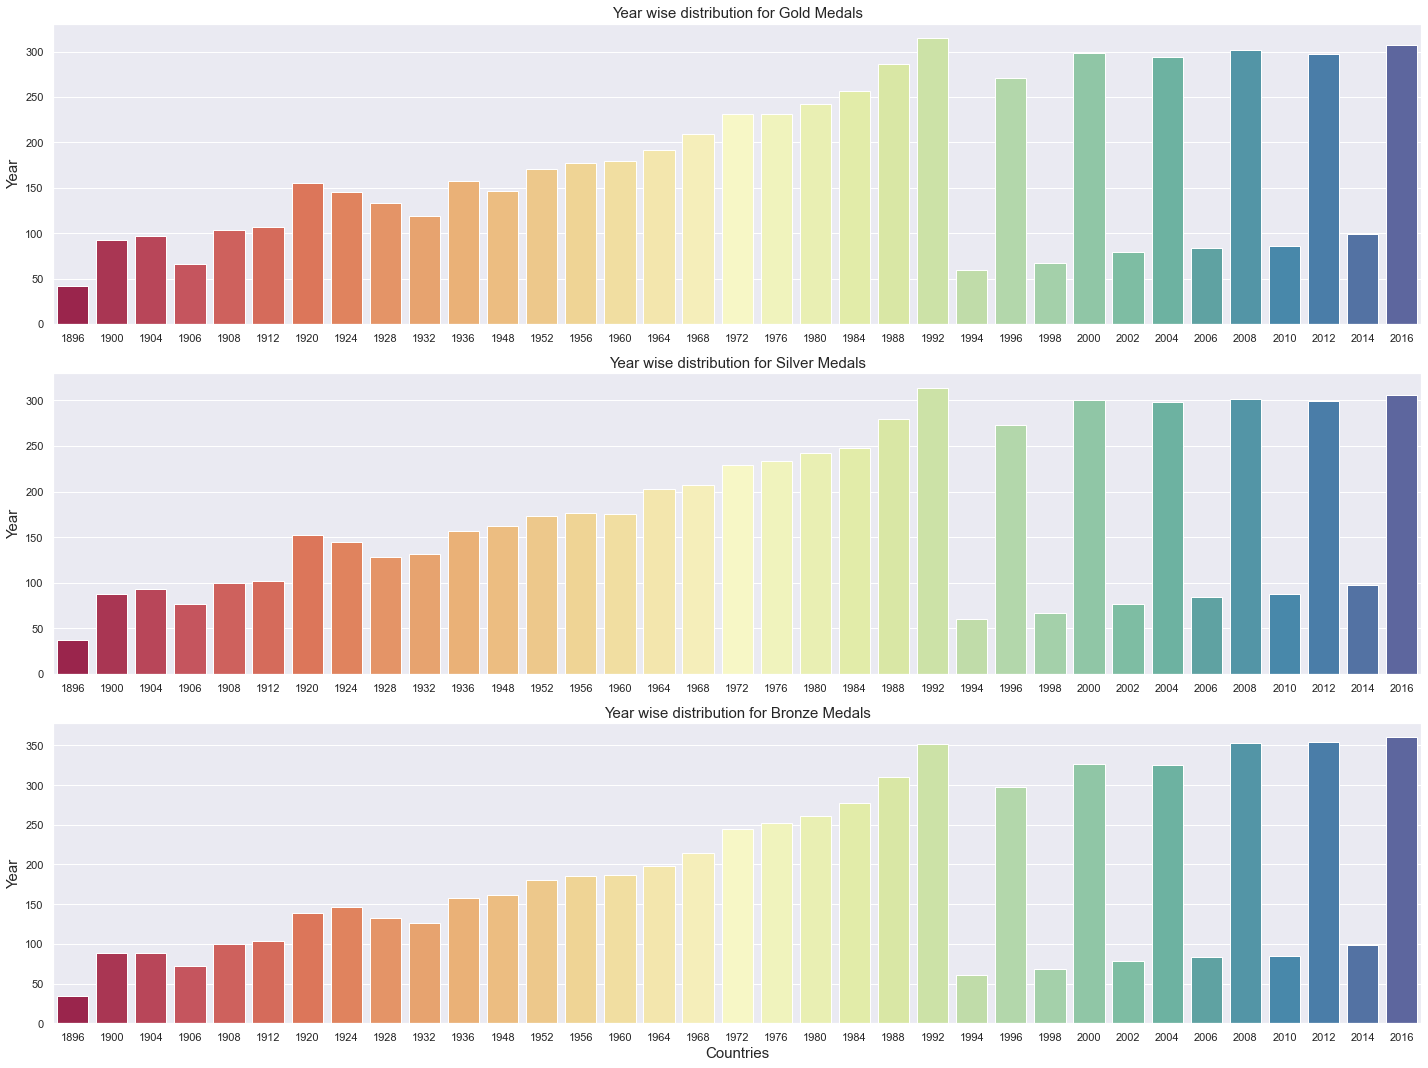

In [241]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(3,1,1)
plt.title('Year wise distribution for Gold Medals', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=g.index, y=g, palette = 'Spectral');
#sns.lineplot(x=g.index, y=g, palette = 'rocket');

plt.subplot(3,1,2)
plt.title('Year wise distribution for Silver Medals', fontsize=15)
#plt.xlabel('Countries', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=s.index, y=s, palette = 'Spectral');

plt.subplot(3,1,3)
plt.title('Year wise distribution for Bronze Medals', fontsize=15)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=b.index, y=b, palette = 'Spectral');

plt.tight_layout()

## 4. Season Wise Distribution

In [150]:
womenOlympicsSum = dff[(dff.Gender=='F') & (dff.Season=='Summer')]
womenOlympicsWin = dff[(dff.Gender=='F') & (dff.Season=='Winter')]
womenOlympicsSum

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
79,Ragnhild Margrethe Aamodt,F,27,163,70,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
91,Willemien Aardenburg,F,22,174,70,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands
105,Ann Kristin Aarnes,F,23,182,64,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway
161,Patimat Abakarova,F,21,165,49,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22,179,80,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269588,Vera Igorevna Zvonaryova,F,23,172,59,RUS,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze,Russia
269634,Claudia Antoinette Zwiers,F,22,181,78,NED,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands
269678,Galina Ivanovna Zybina (-Fyodorova),F,21,168,80,URS,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia
269680,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia


Text(0.5, 1.0, 'Women Participation In Winter Season')

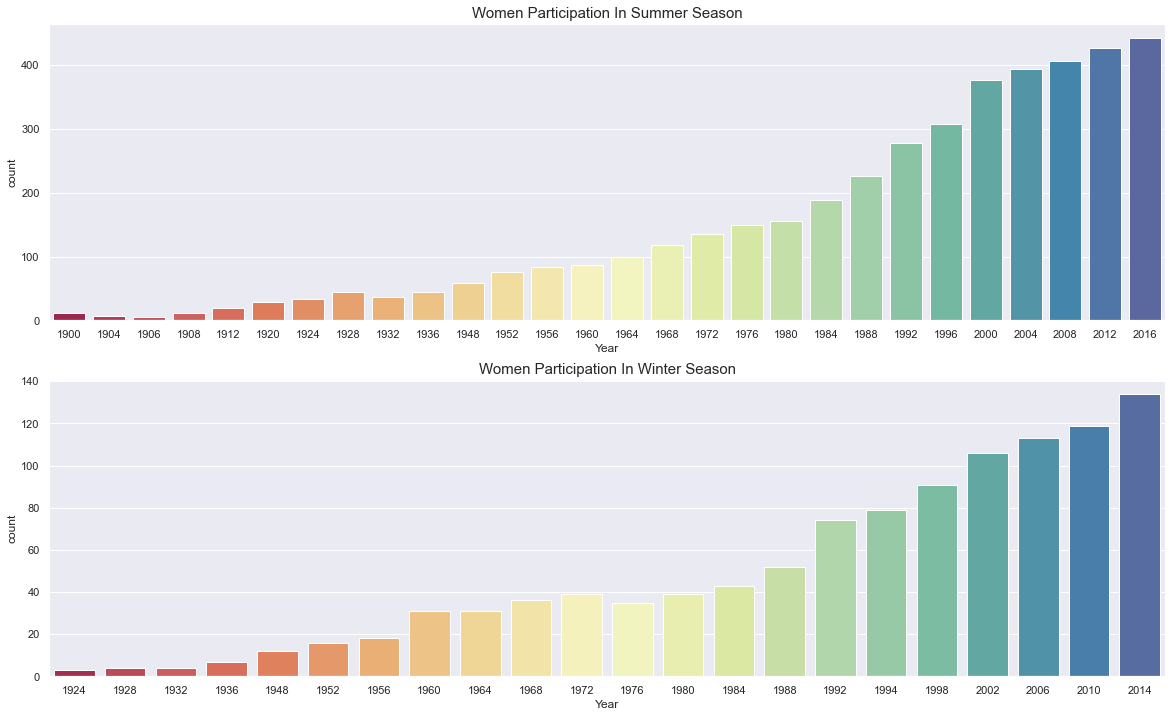

In [151]:
sns.set(style="darkgrid")
plt.figure(figsize =(20,12))

plt.subplot(2,1,1)
sns.countplot(x= 'Year', data=womenOlympicsSum, palette= "Spectral")
#sns.lineplot(x='Year', data=womenOlympicsSum, palette='crest')
plt.title('Women Participation In Summer Season', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(x= 'Year', data=womenOlympicsWin, palette= "Spectral")
plt.title('Women Participation In Winter Season', fontsize=15)

#### Variation of Male/Female athletes over Time (Summer Games)

In [152]:
MenOverTimeSum = dff[(dff.Gender == 'M') & (dff.Season == 'Summer')]
WomenOverTimeSum = dff[(dff.Gender == 'F') & (dff.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

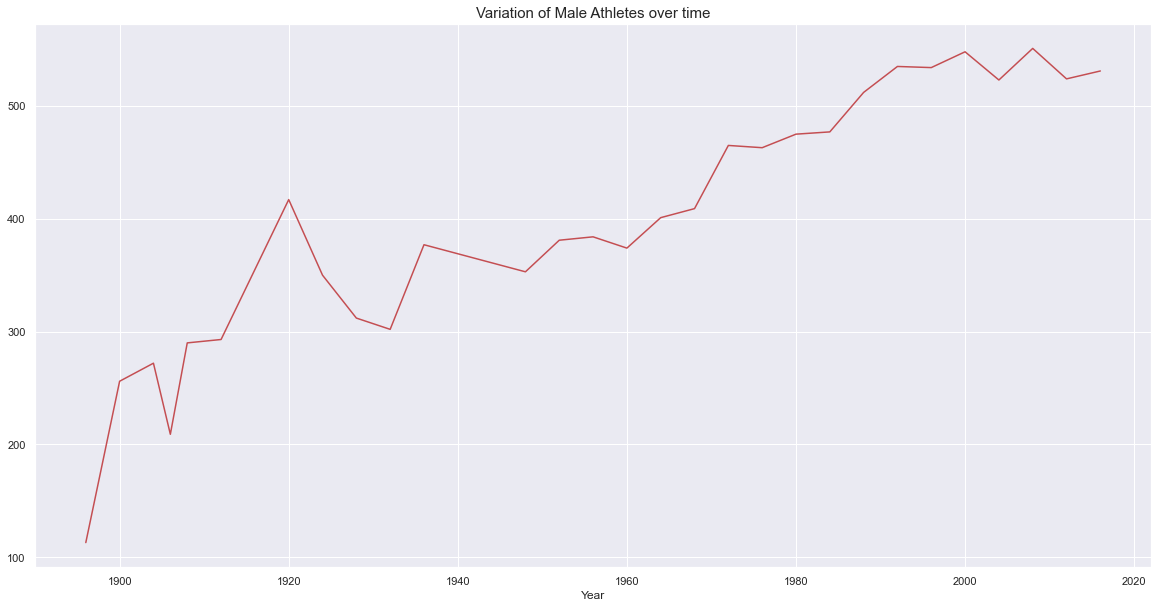

In [153]:
part1 = MenOverTimeSum.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:,'M'].plot(color='r')
plt.title('Variation of Male Athletes over time', fontsize=15)

Text(0.5, 1.0, 'Variation of Female Athletes over time')

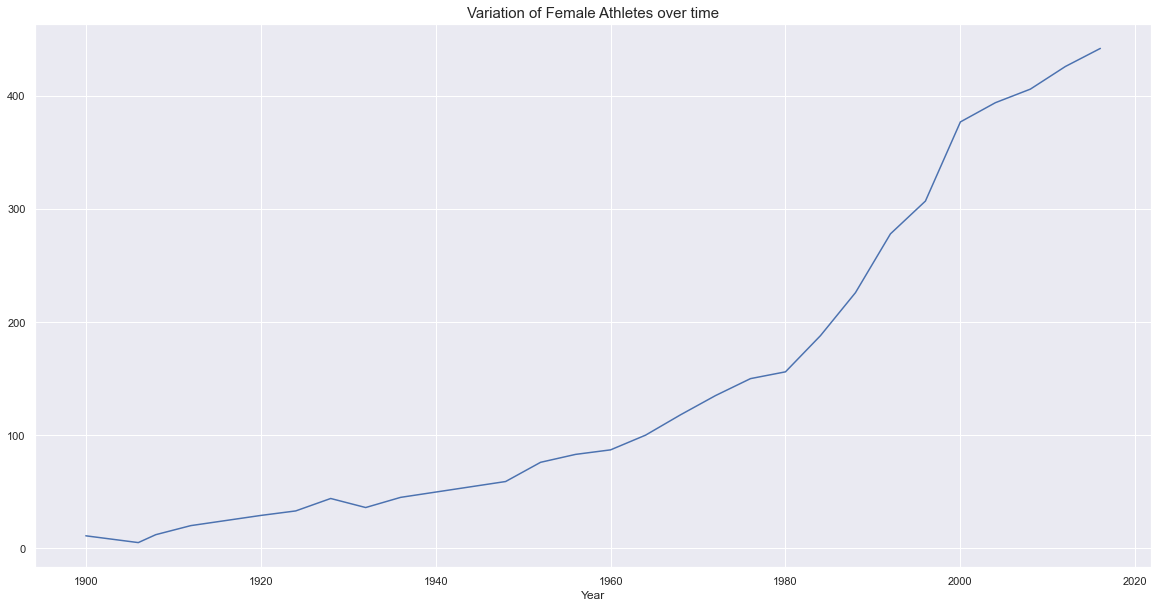

In [154]:
part2 = WomenOverTimeSum.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part2.loc[:,'F'].plot(color='b')
plt.title('Variation of Female Athletes over time', fontsize=15)

#### Variation of Male/Female athletes over Time (Winter Games)

In [155]:
MenOverTimeWin = dff[(dff.Gender == 'M') & (dff.Season == 'Winter')]
WomenOverTimeWin = dff[(dff.Gender == 'F') & (dff.Season == 'Winter')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

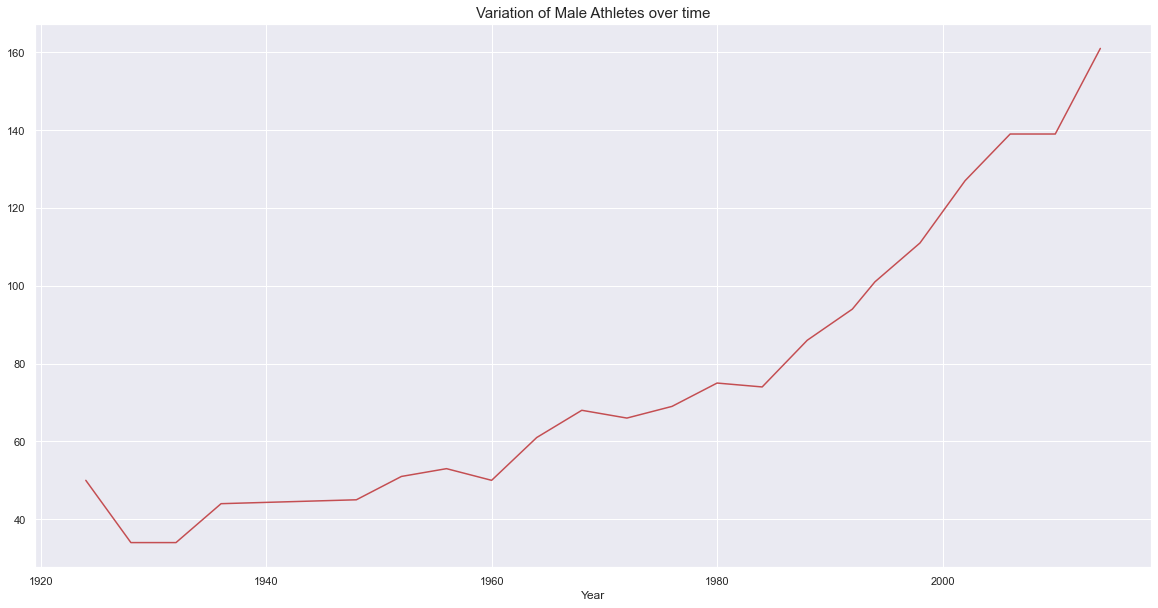

In [156]:
part1 = MenOverTimeWin.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part1.loc[:,'M'].plot(color='r')
plt.title('Variation of Male Athletes over time', fontsize=15)

Text(0.5, 1.0, 'Variation of Female Athletes over time')

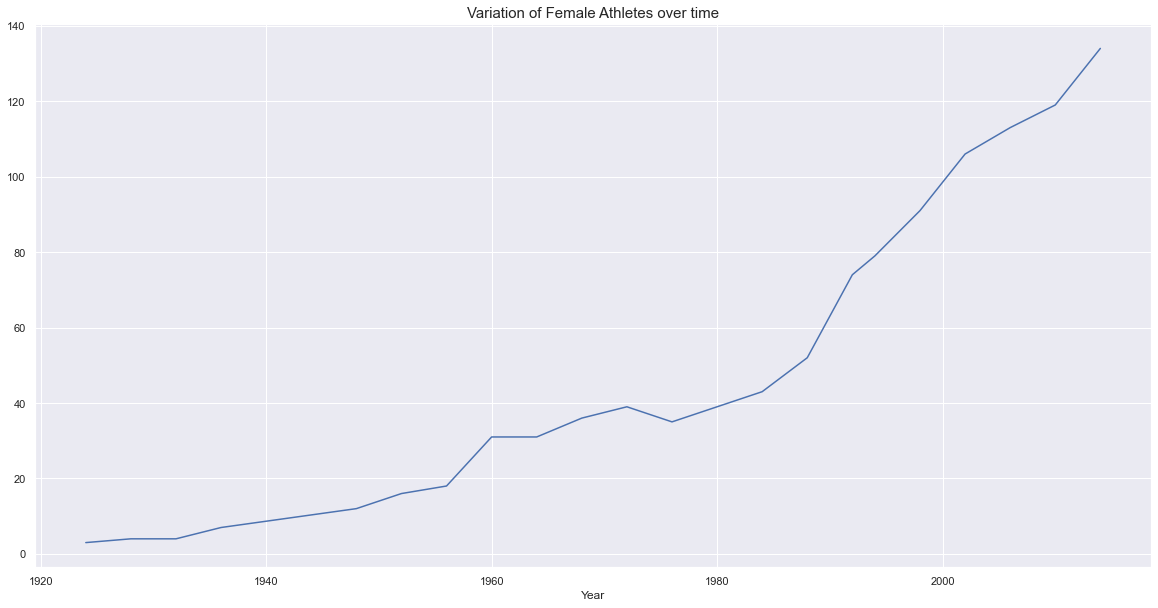

In [157]:
part2 = WomenOverTimeWin.groupby('Year')['Gender'].value_counts()
plt.figure(figsize=(20, 10))
part2.loc[:,'F'].plot(color='b')
plt.title('Variation of Female Athletes over time', fontsize=15)

## 5 Age & Height Wise Distribution

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

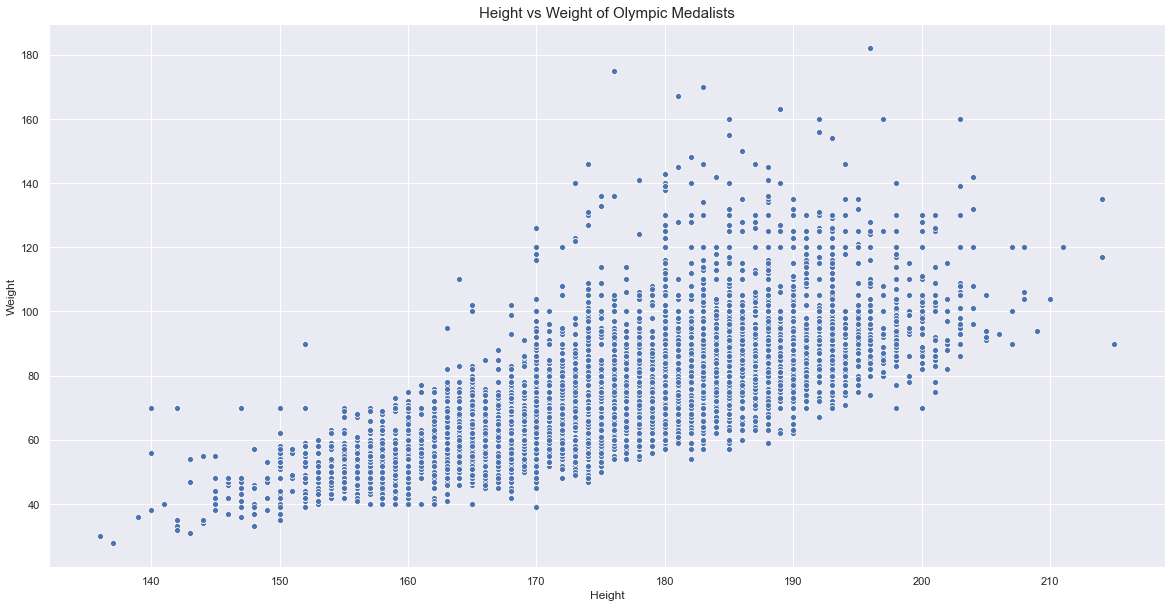

In [158]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=dff)
plt.title('Height vs Weight of Olympic Medalists', fontsize=15)

In [159]:
age_ab_60 = dff[dff.Age>=60]
age_ab_60.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
21904,Rudolf Georg Binding,M,60,174,70,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Literature, Lyric Works",Silver,Germany
32766,John Hurst Butt,M,61,174,70,GBR,1912,Summer,Stockholm,Shooting,"Shooting Men's Trap, Team",Silver,United Kingdom
44365,John (Herbert Crawford-) Copley (Williamson-),M,73,174,70,GBR,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,United Kingdom
59672,Jozu Dupon,M,72,174,70,BEL,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",Bronze,Belgium
88810,Letitia Marion Hamilton,F,69,174,70,IRL,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze,Ireland


In [160]:
age_ab_60[age_ab_60.Age>=60].Age.count()

24

In [161]:
age_ab_60[['Name','Age','Medal','Sport','Region']]

,Name,Age,Medal,Sport,Region
21904,Rudolf Georg Binding,60,Silver,Art Competitions,Germany
32766,John Hurst Butt,61,Silver,Shooting,United Kingdom
44365,John (Herbert Crawford-) Copley (Williamson-),73,Silver,Art Competitions,United Kingdom
59672,Jozu Dupon,72,Bronze,Art Competitions,Belgium
88810,Letitia Marion Hamilton,69,Bronze,Art Competitions,Ireland
103404,Isaac Lazarus Israls,63,Gold,Art Competitions,Netherlands
104596,Charles Jacobus,64,Gold,Roque,USA
130017,"Josef Maximilian ""Max"" Laeuger",63,Bronze,Art Competitions,Germany
144905,Frederick William MacMonnies,68,Silver,Art Competitions,USA
153942,Robert Tait McKenzie,65,Bronze,Art Competitions,Canada


In [162]:
age_un_20 = dff[dff.Age<=20]
age_un_20

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
60,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
61,Kjetil Andr Aamodt,M,20,176,85,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway
311,Nia Nicole Abdallah,F,20,175,56,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
677,Irene Abel,F,19,160,48,GDR,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver,Germany
684,Jennifer Abel,F,20,160,62,CAN,2012,Summer,London,Diving,Diving Women's Synchronized Springboard,Bronze,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269035,Zou Kai,M,20,158,55,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Horizontal Bar,Gold,China
269196,Martina Zubi,F,19,173,55,CRO,2008,Summer,Beijing,Taekwondo,Taekwondo Women's Featherweight,Bronze,Croatia
269317,"Giovanni Battista ""Gianni"" Zuddas",M,20,174,70,ITA,1948,Summer,London,Boxing,Boxing Men's Bantamweight,Silver,Italy
269375,Robertas ulpa,M,20,193,82,URS,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Breaststroke,Gold,Russia


In [163]:
sp = dff.Sport.value_counts().sort_values(ascending=False)
sp

Athletics        2920
Swimming         1670
Wrestling        1287
Gymnastics        970
Boxing            940
                 ... 
Cricket             3
Roque               3
Jeu De Paume        3
Aeronautics         1
Basque Pelota       1
Name: Sport, Length: 66, dtype: int64

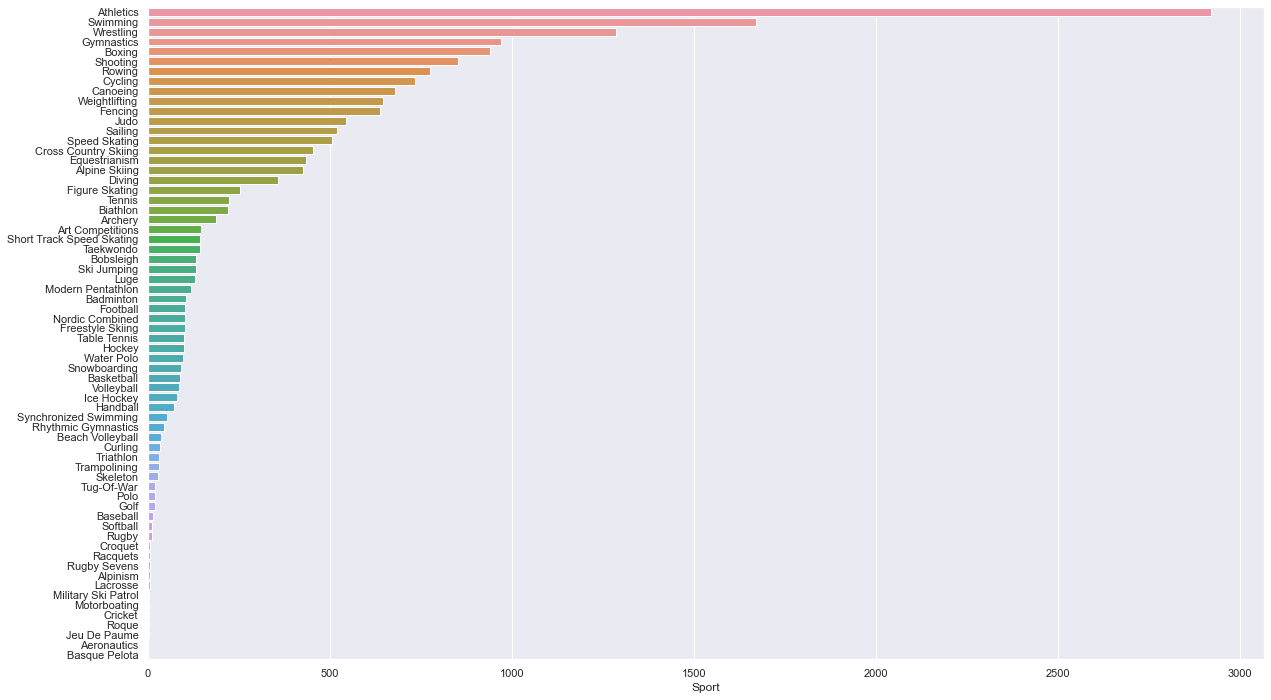

In [164]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=0)

sns.barplot(sp, sp.index)
plt.show()

In [165]:
dff.head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
3,Edgar Lindenau Aabye,M,34,174,70,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,Arvo Ossian Aaltonen,M,30,174,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,Arvo Ossian Aaltonen,M,30,174,70,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,Juhamatti Tapio Aaltonen,M,28,184,85,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,Paavo Johannes Aaltonen,M,28,175,64,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [166]:
sp_medal = dff[['Sport', 'Medal']]
sp_medal.Medal.value_counts()

Bronze    6503
Gold      6098
Silver    6098
Name: Medal, dtype: int64

In [167]:
g_medal = sp_medal[sp_medal.Medal == 'Gold'].Sport.value_counts().sort_values(ascending=False).head(50)
s_medal = sp_medal[sp_medal.Medal == 'Silver'].Sport.value_counts().sort_values(ascending=False).head(50)
# s_medal
b_medal = sp_medal[sp_medal.Medal == 'Bronze'].Sport.value_counts().sort_values(ascending=False).head(50)
b_medal.head()

Athletics     982
Swimming      559
Wrestling     466
Boxing        439
Gymnastics    318
Name: Sport, dtype: int64

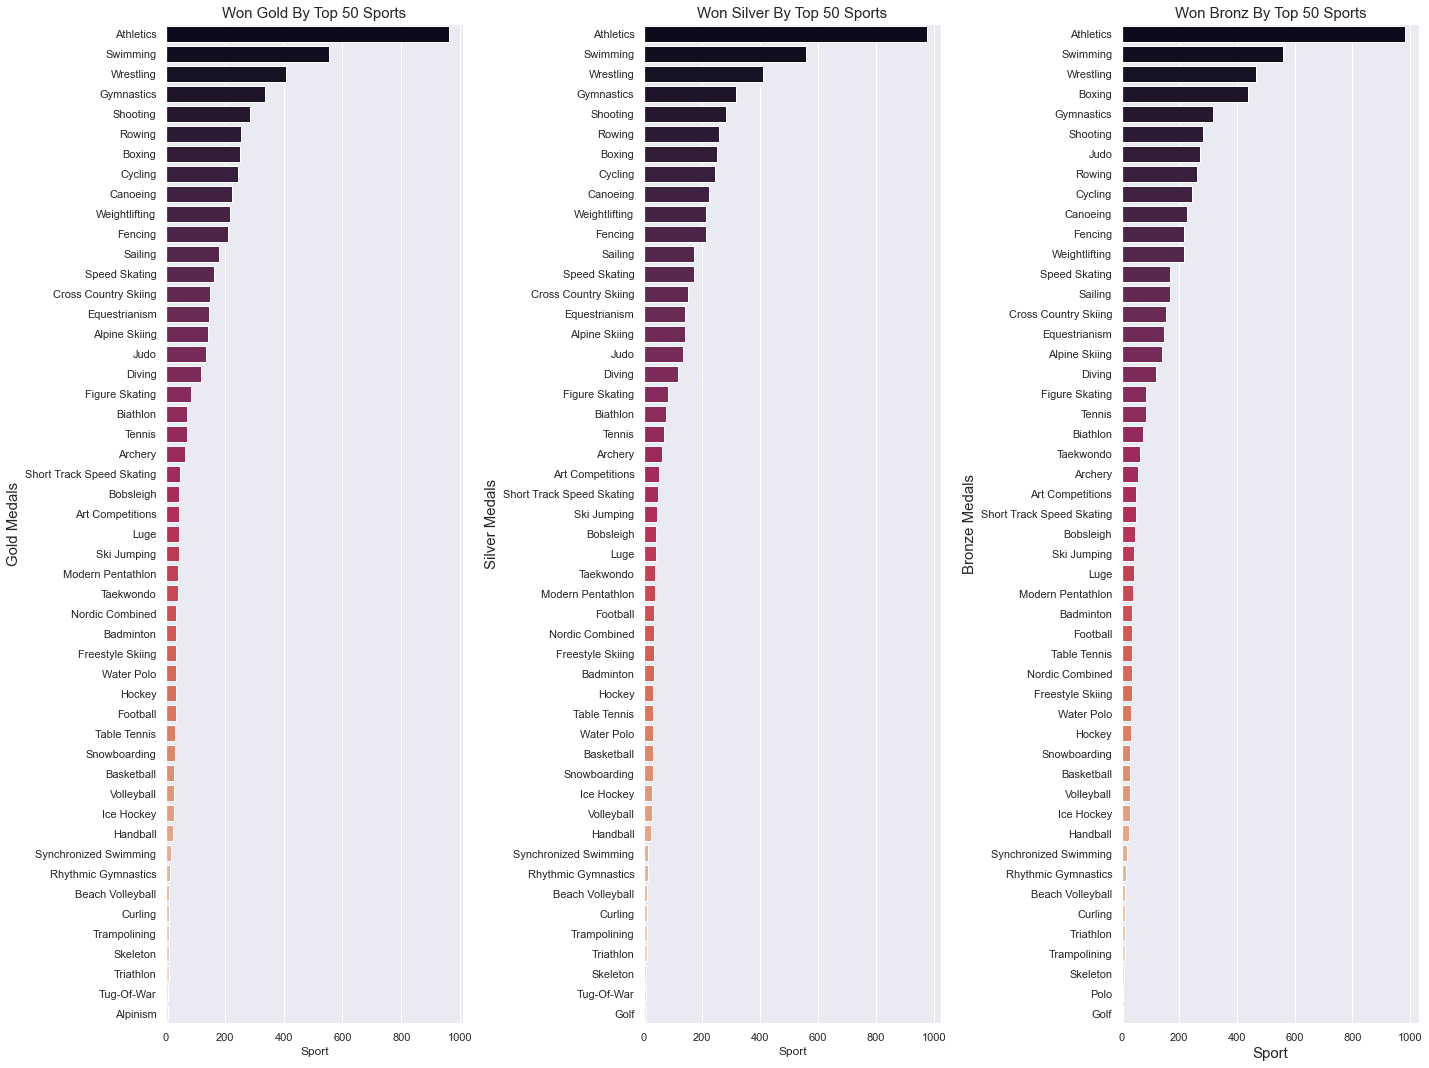

In [169]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.subplot(1,3,1)
plt.title('Won Gold By Top 50 Sports', fontsize=15)
#plt.xlabel('Sports', fontsize=15)
plt.ylabel('Gold Medals', fontsize=15)
sns.barplot(x=g_medal, y=g_medal.index, palette = 'rocket');
#sns.lineplot(x=g_medal, y=g_medal.index, palette = 'crest');

plt.subplot(1,3,2)
plt.title('Won Silver By Top 50 Sports', fontsize=15)
#plt.xlabel('Sports', fontsize=15)
plt.ylabel('Silver Medals', fontsize=15)
sns.barplot(x=s_medal, y=s_medal.index, palette = 'rocket');
#sns.lineplot(x=s_medal, y=s_medal.index, color='b', palette = 'crest');

plt.subplot(1,3,3)
plt.title('Won Bronz By Top 50 Sports', fontsize=15)
plt.xlabel('Sports', fontsize=15)
plt.ylabel('Bronze Medals', fontsize=15)
sns.barplot(x=b_medal, y=b_medal.index, palette = 'rocket');
#sns.lineplot(x=b_medal, y=b_medal.index, color='b', palette = 'crest');

plt.tight_layout()

## 6 Participants

In [170]:
participants = dff.Name.value_counts().head(50)
#participants.count()

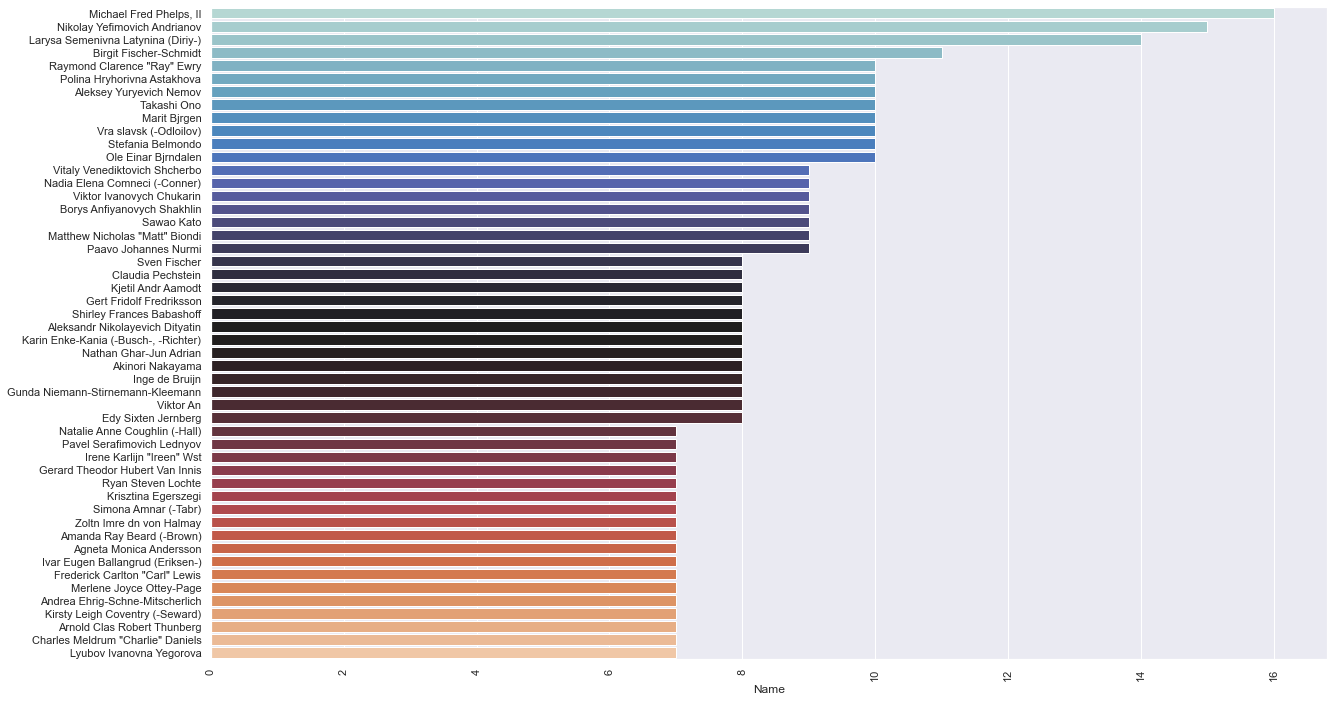

In [171]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.barplot(x = participants, y = participants.index, palette="icefire")

## 7 Country Comparison

### India

In [172]:
ind = dff[(dff.Region=='India') & (dff.Medal == 'Gold')]
ind

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
4729,Shaukat Ali,M,30,174,70,IND,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4733,Syed Mushtaq Ali,M,22,165,61,IND,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
5027,Richard James Allen,M,30,172,70,IND,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
5028,Richard James Allen,M,34,172,70,IND,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
21119,Vasudevan Bhaskaran,M,29,174,68,IND,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
21909,Abhinav Bindra,M,25,173,70,IND,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India
42275,Leslie Walter Claudius,M,21,162,53,IND,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India
42276,Leslie Walter Claudius,M,25,162,53,IND,1952,Summer,Helsinki,Hockey,Hockey Men's Hockey,Gold,India
42277,Leslie Walter Claudius,M,29,162,53,IND,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,Gold,India
217095,Antarge Sherpa,M,25,174,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India


In [173]:
print('Total Gold Medal Wond By Indan Players : ', ind[ind['Medal']=='Gold'].Medal.count())
print('Total Silver Medal Wond By Indan Players : ', ind[ind['Medal']=='Silver'].Medal.count())
print('Total Bronze Medal Wond By Indan Players : ', ind[ind['Medal']=='Bronze'].Medal.count(), '\n')
print('Total Medal Wond By Indan Players : ', ind.Medal.value_counts().sum())
print('Total Participants For Sports Hockey : ', ind[ind['Sport']=='Hockey'].Sport.value_counts().sum())

Total Gold Medal Wond By Indan Players :  10
Total Silver Medal Wond By Indan Players :  0
Total Bronze Medal Wond By Indan Players :  0 

Total Medal Wond By Indan Players :  10
Total Participants For Sports Hockey :  8


In [174]:
ind[ind['Sport']!='Hockey'].head()

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
21909,Abhinav Bindra,M,25,173,70,IND,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India
217095,Antarge Sherpa,M,25,174,70,IND,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,India


### United State Of America (USA)

In [175]:
usa = dff[dff.Region=='USA']
usa

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region
186,Stephen Anthony Abas,M,26,165,55,USA,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA
278,Jeremy Abbott,M,28,175,70,USA,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,USA
283,Margaret Ives Abbott (-Dunne),F,23,174,70,USA,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
286,Monica Cecilia Abbott,F,23,191,88,USA,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA
311,Nia Nicole Abdallah,F,20,175,56,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265829,Mariel Leigh Zagunis,F,19,173,72,USA,2004,Summer,Athina,Fencing,"Fencing Women's Sabre, Individual",Gold,USA
265830,Mariel Leigh Zagunis,F,23,173,72,USA,2008,Summer,Beijing,Fencing,"Fencing Women's Sabre, Individual",Gold,USA
266491,"Peter Timothy ""Pete"" Zaremba",M,24,195,92,USA,1932,Summer,Los Angeles,Athletics,Athletics Men's Hammer Throw,Bronze,USA
268462,Suzanne Winona Zimmerman (-Edwards),F,23,174,70,USA,1948,Summer,London,Swimming,Swimming Women's 100 metres Backstroke,Silver,USA


In [176]:
print('Total Gold Medal Wond By USA Players : ', usa[usa['Medal']=='Gold'].Medal.count())
print('Total Silver Medal Wond By USA Players : ', usa[usa['Medal']=='Silver'].Medal.count())
print('Total Bronze Medal Wond By USA Players : ', usa[usa['Medal']=='Bronze'].Medal.count(), '\n')
print('Total Medal Wond By USA Players : ', usa.Medal.value_counts().sum())

Total Gold Medal Wond By USA Players :  1071
Total Silver Medal Wond By USA Players :  872
Total Bronze Medal Wond By USA Players :  770 

Total Medal Wond By USA Players :  2713


### 8 GDP wise distribution

In [180]:
#import GDP
dfg = pd.read_csv('GDP1.csv')
#dfg.Region.sort_values(ascending=True).unique()
dfg

,Region,Year,GDP
0,Afghanistan,1992,3.475000e+09
1,Albania,1992,6.521750e+08
2,Algeria,1992,4.800308e+10
3,Andorra,1992,1.210014e+09
4,Angola,1992,9.395000e+09
...,...,...,...
2543,Venezuela,2016,2.790000e+11
2544,Vietnam,2016,2.050000e+11
2545,Yemen,2016,3.131737e+10
2546,Zambia,2016,2.095841e+10


In [181]:
df.Year.sort_values(ascending=True).unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [182]:
df_new = df.loc[df.Year.isin([1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016])]
df_new.isnull().sum()

Name          0
Gender        0
Age           0
Height        0
Weight        0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     53361
Region        0
dtype: int64

In [183]:
df_new = df_new.merge(dfg, on=['Region','Year'], how='left')
df_new.isnull().sum()

Name          0
Gender        0
Age           0
Height        0
Weight        0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     53361
Region        0
GDP         846
dtype: int64

In [184]:
#df_new[df_new.isnull().any(axis=1)]
df_new[df_new.GDP.isnull()]

,Name,Gender,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Medal,Region,GDP
226,Hamza Abdo,M,17,174,70,PLE,2008,Summer,Beijing,Swimming,Swimming Men's 50 metres Freestyle,NaN,Palestine,NaN
341,"Julianne ""Anne"" Abernathy",F,38,165,75,ISV,1992,Winter,Albertville,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
342,"Julianne ""Anne"" Abernathy",F,40,165,75,ISV,1994,Winter,Lillehammer,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
343,"Julianne ""Anne"" Abernathy",F,44,165,75,ISV,1998,Winter,Nagano,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
344,"Julianne ""Anne"" Abernathy",F,48,165,75,ISV,2002,Winter,Salt Lake City,Luge,Luge Women's Singles,NaN,"Virgin Islands, US",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60370,Linda Yeomans,F,40,174,70,GUM,1992,Summer,Barcelona,Sailing,Sailing Women's Windsurfer,NaN,Guam,NaN
60539,Yu Shu-Chen,F,16,150,48,TPE,1996,Summer,Atlanta,Judo,Judo Women's Extra-Lightweight,NaN,Taiwan,NaN
60868,Rita Zeqiri,F,20,165,55,KOS,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Backstroke,NaN,Kosovo,NaN
61006,Lum Zhaveli,M,26,194,88,KOS,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,NaN,Kosovo,NaN


In [185]:
#dfg.Region.sort_values(ascending=True).unique()

In [186]:
#df_new.Region.sort_values(ascending=True).unique()

In [187]:
df_new = df_new[df_new['GDP'].notna()]

In [188]:
df_new.isnull().sum()

Name          0
Gender        0
Age           0
Height        0
Weight        0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     52542
Region        0
GDP           0
dtype: int64

In [189]:
df_new.shape

(60479, 14)

## Data Preprocessing

In [190]:
df_new.columns

Index(['Name', 'Gender', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season',
       'City', 'Sport', 'Event', 'Medal', 'Region', 'GDP'],
      dtype='object')

In [191]:
dfn = df_new[['Gender', 'Age', 'Height', 'Weight', 'Season', 'Sport', 'Medal', 'Region','GDP']]
dfn.head()

,Gender,Age,Height,Weight,Season,Sport,Medal,Region,GDP
0,M,24,180,80,Summer,Basketball,NaN,China,4.270000e+11
1,M,23,170,60,Summer,Judo,NaN,China,8.530000e+12
2,F,25,185,82,Winter,Speed Skating,NaN,Netherlands,3.630000e+11
3,F,25,185,82,Winter,Speed Skating,NaN,Netherlands,3.630000e+11
4,F,27,185,82,Winter,Speed Skating,NaN,Netherlands,3.790000e+11


In [192]:
le = LabelEncoder()
dfn['Gender']= le.fit_transform(dfn['Gender'])

dfn['Gender'].unique()

<ipython-input-192-0626bf171bf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Gender']= le.fit_transform(dfn['Gender'])


array([1, 0])

In [193]:
print('Male =', 1, '\nFemale =', 0)

Male = 1 
Female = 0


In [194]:
dfn.Season.unique()

array(['Summer', 'Winter'], dtype=object)

In [195]:
dfn['Season']= le.fit_transform(dfn['Season'])

<ipython-input-195-0e9a111bc53e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['Season']= le.fit_transform(dfn['Season'])


In [197]:
print('\n 0 = Summer \n 1 = Winter')


 0 = Summer 
 1 = Winter


In [198]:
dfn.Medal.fillna('No Medal', inplace=True)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [203]:
dfn.Medal.value_counts()

No Medal    52542
Bronze       2827
Silver       2556
Gold         2554
Name: Medal, dtype: int64

In [204]:
dfn['Medal'].replace({'Gold' : 1, 'Silver' :  1, 'Bronze' : 1, 'No Medal' : 0}, inplace = True)

C:\Users\SHUBHAM KUMAR\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [205]:
dfn.Medal.value_counts()

0    52542
1     7937
Name: Medal, dtype: int64

In [206]:
dfn = pd.get_dummies(dfn, columns = ['Sport', 'Region'])

In [217]:
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,8.530000e+12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61320,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61321,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61322,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61323,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Remove Outliers

In [208]:
Q1 = dfn.Height.quantile(0.25)
Q3 = dfn.Height.quantile(0.75)
Q1, Q3

(168.0, 182.0)

In [209]:
IQR = Q3 - Q1
IQR

14.0

In [210]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(147.0, 203.0)

In [218]:
dfn = dfn[(dfn.Height>147) & (dfn.Height<203)]
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,8.530000e+12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61320,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61321,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61322,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61323,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
dfn.shape

(55877, 253)

In [220]:
q1 = dfn.Age.quantile(0.25)
q3 = dfn.Age.quantile(0.75)
q1,q3

(22.0, 28.0)

In [221]:
IQR = q3-q1
IQR

6.0

In [222]:
lower_limit = q1-1.5*IQR
upper_limit = q3+1.5*IQR
lower_limit, upper_limit

(13.0, 37.0)

In [223]:
dfn = dfn[(dfn.Age>13) & (dfn.Age<37)]
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,8.530000e+12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61320,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61321,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61322,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61323,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
Q1 = dfn.Weight.quantile(0.25)
Q3 = dfn.Weight.quantile(0.75)
Q1, Q3

(60.0, 78.0)

In [225]:
IQR = Q3 - Q1
IQR

18.0

In [226]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(33.0, 105.0)

In [227]:
dfn = dfn[(dfn.Weight>33) & (dfn.Weight<105)]
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,0,0,8.530000e+12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61320,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61321,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61322,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61323,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


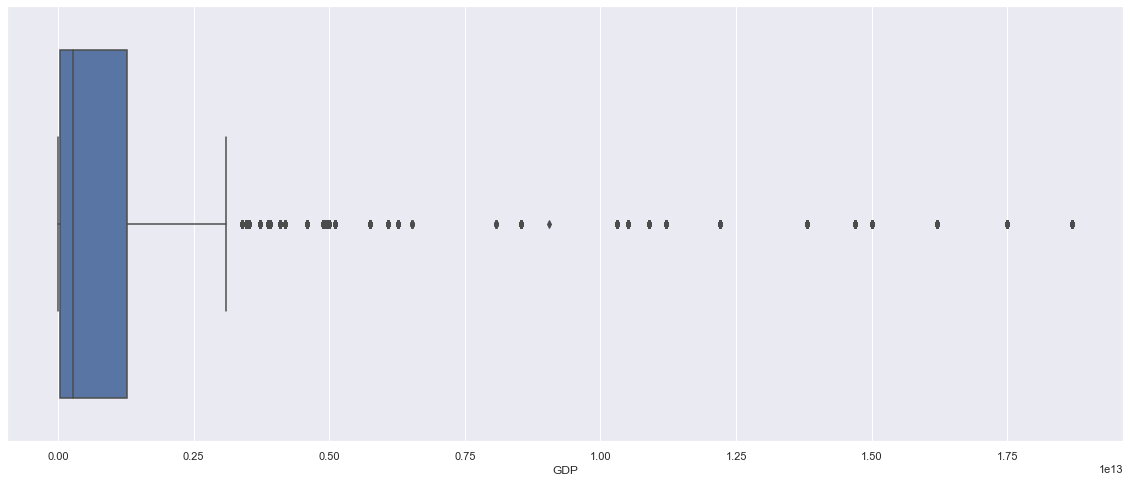

In [228]:
plt.figure(figsize=(20,8))
sns.boxplot(x=dfn['GDP'])

In [229]:
Q1 = dfn.GDP.quantile(0.25)
Q3 = dfn.GDP.quantile(0.75)
Q1, Q3

(47218405892.0, 1280000000000.0)

In [230]:
IQR = Q3-Q1
IQR

1232781594108.0

In [231]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-1801953985270.0, 3129172391162.0)

In [232]:
dfn = dfn[(dfn.GDP>lower_limit) & (dfn.GDP<upper_limit)]
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61320,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61321,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61322,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61323,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
dfn.reset_index(drop=True, inplace=True)
dfn

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,0,4.270000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,0,3.630000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,0,3.790000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,1,25,182,79,1,0,1.750000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49207,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49208,1,29,182,79,1,0,1.990000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49209,1,33,182,79,1,0,3.450000e+11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [412]:
#dfn.isnull().sum().sum()

In [705]:
dfn.to_csv("Olympics_cd.csv")

In [398]:
dfn.Medal.value_counts()

0    43398
1     5813
Name: Medal, dtype: int64

In [413]:
(5813/43398)*100

13.394626480482971

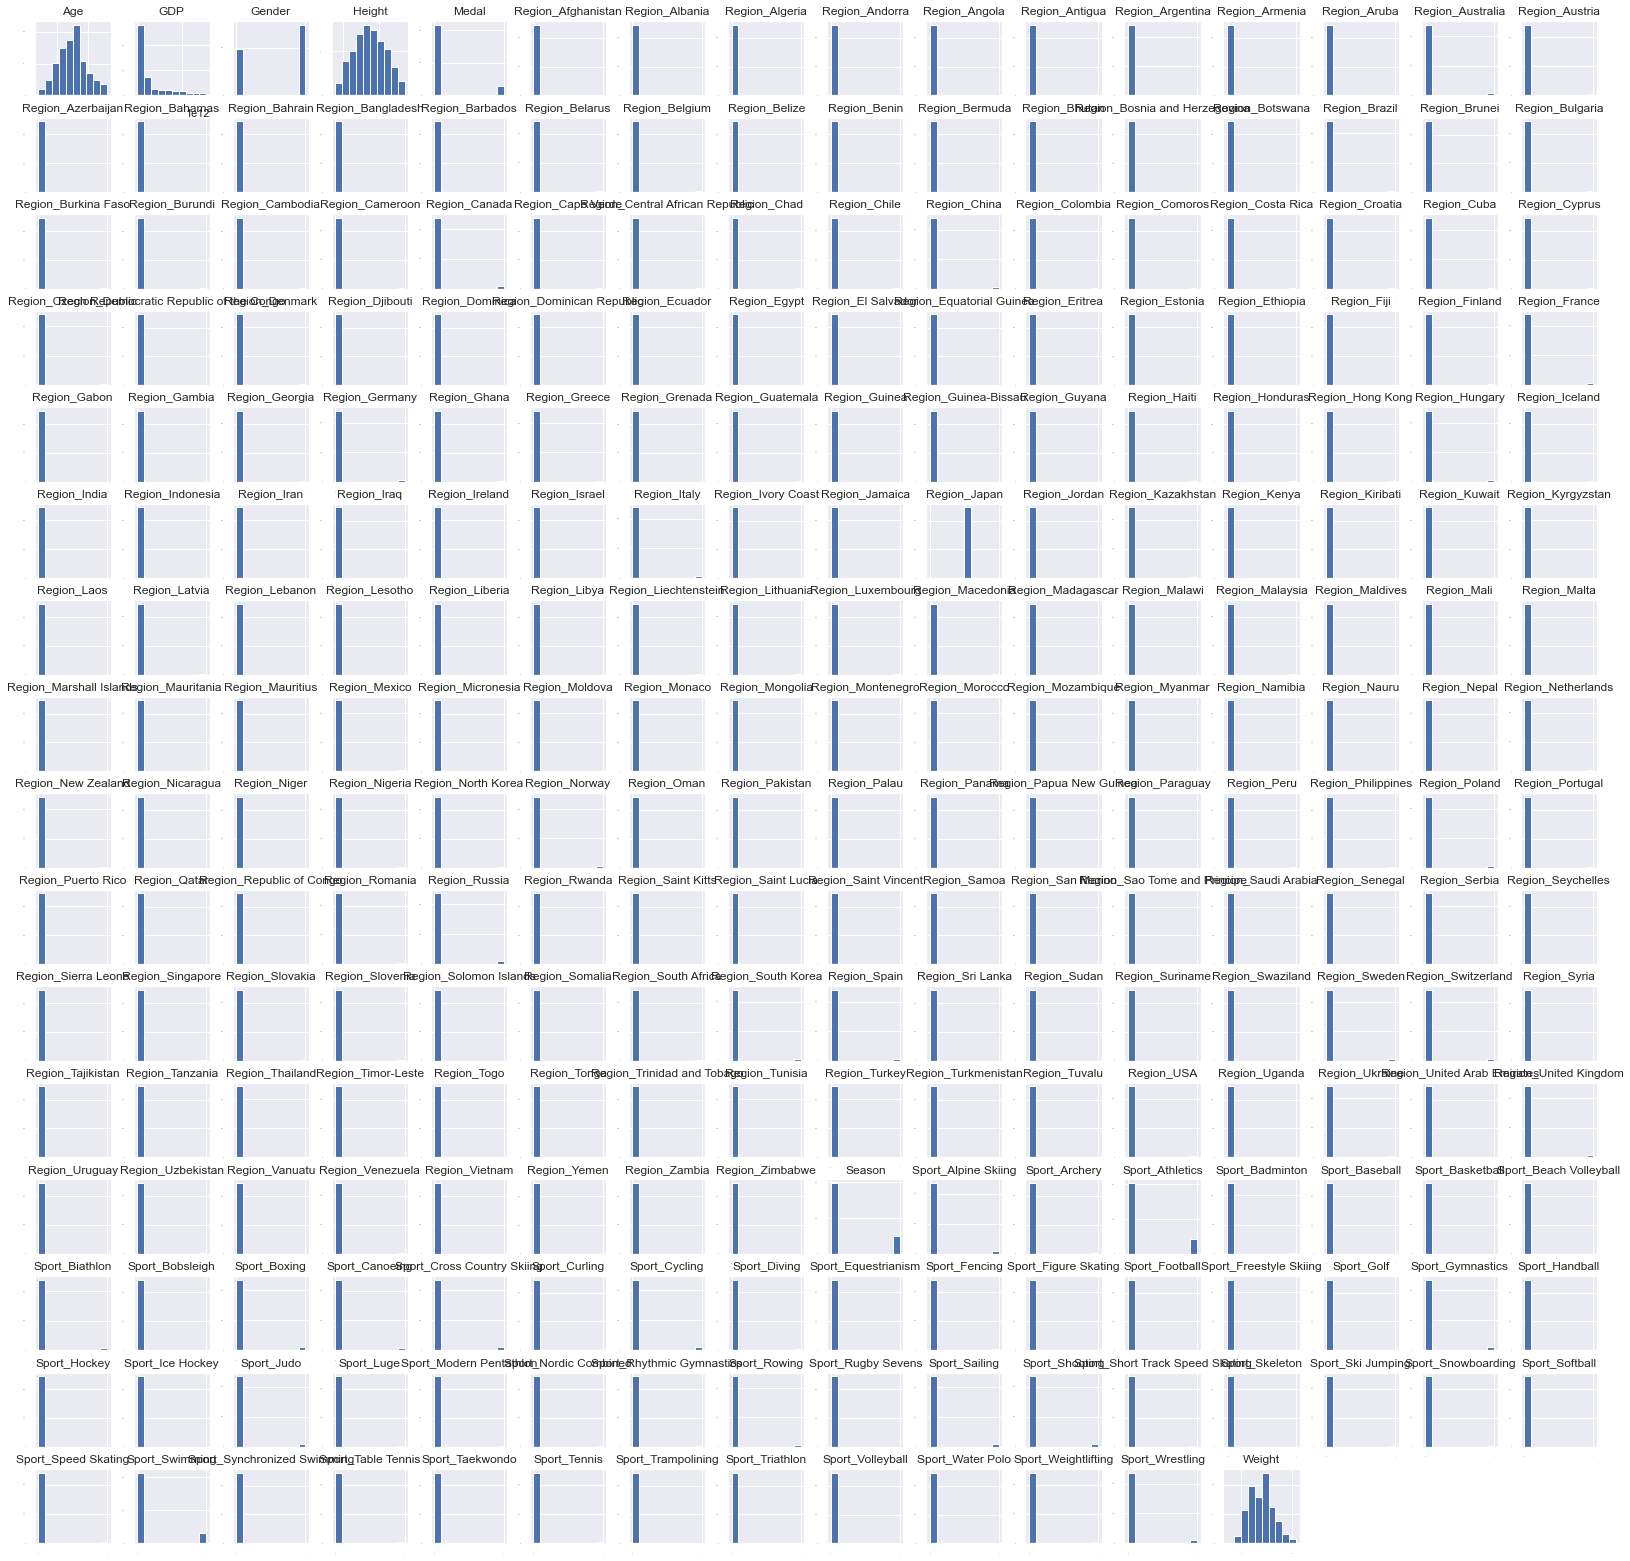

In [425]:
dfn.hist(xlabelsize=1,ylabelsize=1,figsize=(28,28))
plt.show()
# dfn.Region_Angola.value_counts()


In [400]:
dfn.corr()

,Gender,Age,Height,Weight,Season,Medal,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
Gender,1.000000,0.098403,0.493667,0.521065,-0.018729,-0.016258,-0.065102,-0.020266,-0.019751,-0.064011,...,0.018521,-0.018092,0.014041,0.022445,0.001339,0.011979,-0.018176,0.013812,0.008578,-0.001827
Age,0.098403,1.000000,0.082064,0.133276,-0.000488,0.056564,0.080887,-0.055189,-0.007452,0.088507,...,-0.012779,0.023649,0.000760,-0.009603,-0.009618,0.002601,-0.017936,-0.020183,-0.012805,-0.005808
Height,0.493667,0.082064,1.000000,0.750261,-0.031208,0.015988,0.015442,-0.010013,-0.017293,0.024451,...,-0.007453,0.021667,0.012284,0.008800,-0.014602,-0.010495,-0.033724,-0.014779,-0.004146,-0.001602
Weight,0.521065,0.133276,0.750261,1.000000,0.007560,0.028602,-0.005117,0.077579,0.003512,-0.107683,...,-0.001857,0.017136,0.015169,0.007581,-0.009842,0.005473,-0.035865,-0.015693,-0.006801,-0.008241
Season,-0.018729,-0.000488,-0.031208,0.007560,1.000000,0.027093,0.055118,0.426363,-0.052611,-0.224274,...,-0.016523,-0.021815,-0.017685,-0.027788,-0.011573,-0.038818,-0.019807,-0.012401,-0.016065,-0.019769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Region_Venezuela,0.011979,0.002601,-0.010495,0.005473,-0.038818,-0.025017,-0.036097,-0.017092,0.003322,-0.018771,...,-0.002715,-0.014161,-0.002906,-0.007015,-0.001901,1.000000,-0.003254,-0.002038,-0.002640,-0.003625
Region_Vietnam,-0.018176,-0.017936,-0.033724,-0.035865,-0.019807,-0.013103,-0.024106,-0.008445,-0.004271,0.004716,...,-0.001341,-0.006997,-0.001436,-0.003466,-0.000940,-0.003254,1.000000,-0.001007,-0.001304,-0.001791
Region_Yemen,0.013812,-0.020183,-0.014779,-0.015693,-0.012401,-0.009189,-0.018219,-0.005288,-0.002674,0.016570,...,-0.000840,-0.004381,-0.000899,-0.002170,-0.000588,-0.002038,-0.001007,1.000000,-0.000817,-0.001122
Region_Zambia,0.008578,-0.012805,-0.004146,-0.006801,-0.016065,-0.009965,-0.023925,-0.006850,-0.003464,0.025109,...,-0.001088,-0.005675,-0.001164,-0.002811,-0.000762,-0.002640,-0.001304,-0.000817,1.000000,-0.001453


In [401]:
dfn.corr()["Medal"].sort_values(ascending=False).tail(50)

Region_Seychelles               -0.013513
Region_Macedonia                -0.013608
Region_Mauritius                -0.014000
Region_Barbados                 -0.014476
Region_Liechtenstein            -0.014488
Region_Brazil                   -0.014502
Region_Fiji                     -0.014768
Region_Algeria                  -0.015032
Region_Andorra                  -0.015224
Region_Philippines              -0.015455
Region_Singapore                -0.015502
Region_Belgium                  -0.015913
Region_Ecuador                  -0.015967
Region_South Africa             -0.016012
Region_Bosnia and Herzegovina   -0.016096
Gender                          -0.016258
Region_Guatemala                -0.016574
Region_India                    -0.016596
Region_Senegal                  -0.016761
Region_Colombia                 -0.017090
Region_Czech Republic           -0.017104
Region_Ireland                  -0.017283
Region_Cyprus                   -0.017376
Sport_Table Tennis              -0

In [477]:
# plt.figure(figsize=(20,20))
# x_cor= dfn.iloc[:,0:7]
# cor = x_cor.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

In [701]:
y = dfn['Medal']

In [702]:
x = dfn.drop(columns=["Medal"], axis=1)

In [703]:
x

,Gender,Age,Height,Weight,Season,GDP,Sport_Alpine Skiing,Sport_Archery,Sport_Athletics,Sport_Badminton,...,Region_United Arab Emirates,Region_United Kingdom,Region_Uruguay,Region_Uzbekistan,Region_Vanuatu,Region_Venezuela,Region_Vietnam,Region_Yemen,Region_Zambia,Region_Zimbabwe
0,1,24,180,80,0,4.270000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,25,185,82,1,3.630000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25,185,82,1,3.630000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,27,185,82,1,3.790000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,185,82,1,3.790000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,1,25,182,79,1,1.750000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49207,1,29,182,79,1,1.990000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49208,1,29,182,79,1,1.990000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49209,1,33,182,79,1,3.450000e+11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [704]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49206    0
49207    0
49208    0
49209    0
49210    0
Name: Medal, Length: 49211, dtype: int64

## Data Standardization

In [540]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [541]:
x.shape

(49211, 252)

In [542]:
print(x.max())
print(x.min())

99.20282254049023
-2.8133156368914825


In [699]:
col=x[:,0]

In [700]:
np.std(col)

1.5612000373572479

In [545]:
# mean_vec = np.mean(x, axis=0)
# cov_mat = (x-mean_vec).T.dot((x-mean_vec))/(x.shape[0]-1)
# print('Covariance Matrix\n%s' %cov_mat)

In [546]:
# cov_mat.shape

In [547]:
# cov_mat = np.cov(x.T)
# eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print('Eigenvelue \n %s' %eig_vals)
# print('Eigenvector \n %s' %eig_vecs)

In [548]:
# eig_vals.shape

In [549]:
# eig_vecs.shape

In [550]:
# eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# print('Eigenvalues in descending order')
# for i in eig_pairs:
#     print(i[0])

[0.00971054 0.0092098 ]


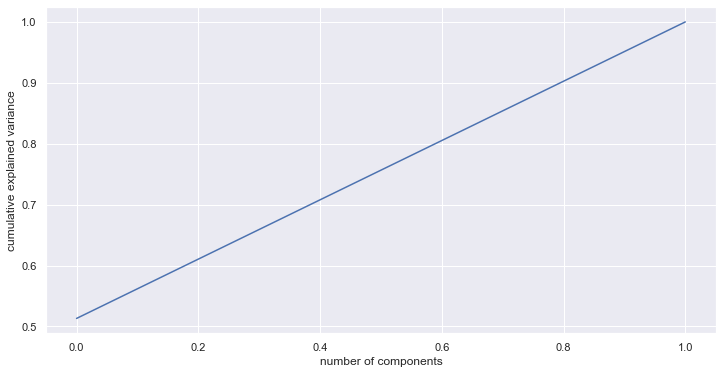

In [551]:
pca = PCA(n_components=2)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

#Explained variance
pca = PCA().fit(x)
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [552]:
# x.shape

In [553]:
# x

In [554]:
# print(x.shape)
# print(x.min())

## Train Test Splitting

In [585]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [586]:
# x_train
# y_train
# x_test
# y_test
print('Total no. of samples: Training and Testing dataset separately!')
print('x_train:', np.shape(x_train))
print('y_train:', np.shape(y_train))
print('x_test:', np.shape(x_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
x_train: (39368, 2)
y_train: (39368,)
x_test: (9843, 2)
y_test: (9843,)


## Logistic Regression

In [684]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [685]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [695]:
count=0
for i in y_pred:
    if i == 0:
        count+=1
    #count += 1
print(count)

9843


In [696]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8714    0]
 [1129    0]]


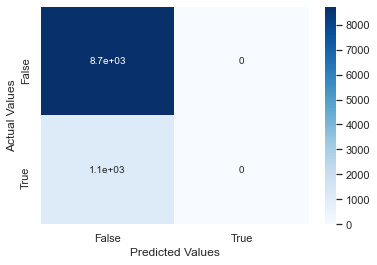

In [697]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [698]:
#from sklearn.metrics import r2_score
result2 = accuracy_score(y_test,y_pred)
print ('R Squared =',r2_score(y_test, y_pred))
print("Accuracy:  ",result2*100,"%")

R Squared = -0.1295616249713103
Accuracy:   88.52991973991669 %


In [595]:
LogReg = round(classifier.score(x_test, y_test), 2)
LogReg

0.89

In [596]:
mae_lr = round(metrics.mean_absolute_error(y_test, y_pred), 4)
mae_lr

0.1147

In [597]:
mse_lr = round(metrics.mean_squared_error(y_test, y_pred), 4)
mse_lr

0.1147

In [598]:
logreg=accuracy_score(y_test,y_pred)
logreg

0.885299197399167

In [599]:
roc_auc_score(y_test, y_pred)

0.5

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

## Support Vector Machine

In [581]:
classifier_svm = SVC(kernel='linear', random_state=0)  
classifier_svm.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [582]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [583]:
#Creating the Confusion matrix  
#from sklearn.metrics import confusion_matrix  
cmat= confusion_matrix(y_test, y_pred)
cmat

array([[8714,    0],
       [1129,    0]], dtype=int64)

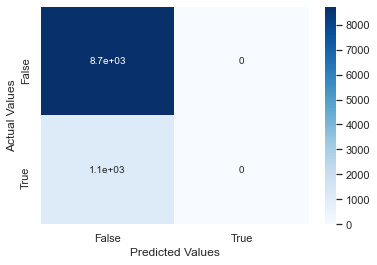

In [584]:
ax = sns.heatmap(cmat, annot=True, cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## K-Nearest Neighbor

In [643]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [644]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [645]:
cmatKnn= confusion_matrix(y_test, y_pred)
cmatKnn

array([[8547,  167],
       [1034,   95]], dtype=int64)

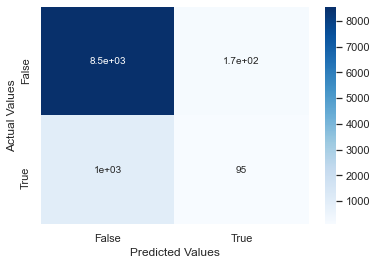

In [646]:
ax = sns.heatmap(cmatKnn, annot=True, cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [674]:
KNN = round(knn.score(x_test, y_test), 6)
KNN

0.877984

In [661]:
# mae_knn = metrics.mean_absolute_error(y_test, y_pred)
# mae_knn

In [662]:
# mse_knn = metrics.mean_squared_error(y_test, y_pred)
# mse_knn

In [650]:
compare_models = pd.DataFrame(
    {  'Model' : ['LogReg', 'KNN'],
       'Score' : [LogReg, KNN],
        'MAE'  : [mae_lr, mae_knn],
        'MSE'  : [mse_lr, mse_knn]
    })
  
print(compare_models)

    Model  Score       MAE       MSE
0  LogReg   0.89  0.114700  0.114700
1     KNN   0.88  0.122016  0.122016


## Decision Tree

In [679]:
classifierDT= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifierDT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [680]:
#Predicting the test set result  
y_pred= classifierDT.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [681]:
#Creating the Confusion matrix  
#from sklearn.metrics import confusion_matrix  
cmDT= confusion_matrix(y_test, y_pred)
cmDT

array([[7943,  771],
       [ 877,  252]], dtype=int64)

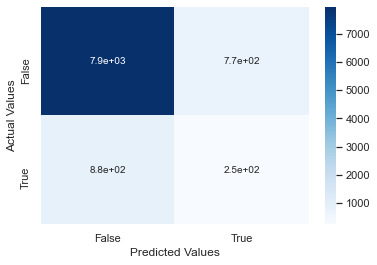

In [682]:
ax = sns.heatmap(cmDT, annot=True, cmap='Blues')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [683]:
resultdt = accuracy_score(y_test,y_pred)
print ('R Squared =',r2_score(y_test, y_pred))
print("Accuracy:  ",resultdt*100,"%")

R Squared = -0.6488198033239321
Accuracy:   83.25713705171187 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


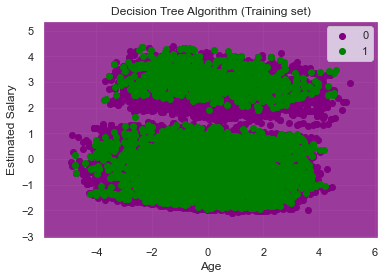

In [670]:
#Visulaizing the trianing set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)
  

plt.title('Decision Tree Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


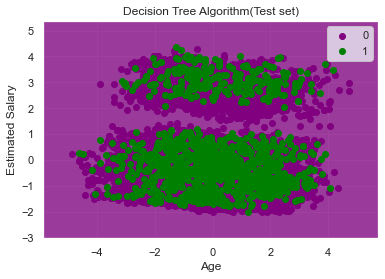

In [671]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)
  
plt.title('Decision Tree Algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 

In [678]:
classifierDT.predict(y_test, y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn import tree
tree.plot_tree(classifierDT.fit(x_train, y_train))

In [ ]:
mae_dt = metrics.mean_absolute_error(y_test, y_pred)
mae_dt

In [ ]:
mse_dt = metrics.mean_squared_error(y_test, y_pred)
mse_dt